In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn import metrics


In [3]:
df = pd.read_csv('C:\\Users\\admin\\Desktop\\BI\\CApstone\\creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
legal = df[df.Class==0]
fraud = df[df.Class==1]
print(legal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [9]:
legal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
legal_sample= legal.sample(n=492)

In [11]:
new_df = pd.concat([legal_sample,fraud],axis=0)

In [12]:
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2400,1959.0,-0.425962,1.078070,1.998883,2.542556,0.432852,1.080055,0.386679,0.350503,-1.261214,...,-0.155548,-0.278023,0.057893,-0.374659,-0.681038,-0.020673,0.229260,-0.040384,11.29,0
135735,81379.0,1.014534,-0.909477,0.768384,-0.727270,-1.485457,-0.503899,-0.745702,0.221532,1.943546,...,0.220505,0.543049,-0.202242,0.307004,0.479154,-0.550494,0.057337,0.034527,98.60,0
147486,88612.0,2.401777,-1.147414,-1.680192,-1.842266,-0.456965,-0.490172,-0.785750,-0.338262,-1.638697,...,0.038519,0.622112,0.003933,0.073561,0.228642,0.084642,-0.009327,-0.058804,11.50,0
219235,141647.0,2.229295,-0.720207,-1.139253,-0.881419,-0.743226,-1.299664,-0.483591,-0.325686,-0.364069,...,0.344531,1.008295,0.088331,0.013556,0.033722,-0.031007,-0.028816,-0.064501,1.21,0
94589,64947.0,-6.327870,3.373477,1.695209,-1.606061,0.023487,0.335386,3.109186,-3.449599,7.929051,...,-1.634373,0.399711,-0.352190,0.482383,0.160342,-0.530889,-4.748881,-3.713108,46.32,0


In [13]:
new_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [14]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [15]:
x = new_df.drop(columns='Class', axis = 1)
y = new_df['Class']

In [16]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
2400      1959.0 -0.425962  1.078070  1.998883  2.542556  0.432852  1.080055   
135735   81379.0  1.014534 -0.909477  0.768384 -0.727270 -1.485457 -0.503899   
147486   88612.0  2.401777 -1.147414 -1.680192 -1.842266 -0.456965 -0.490172   
219235  141647.0  2.229295 -0.720207 -1.139253 -0.881419 -0.743226 -1.299664   
94589    64947.0 -6.327870  3.373477  1.695209 -1.606061  0.023487  0.335386   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [17]:
print(y)

2400      0
135735    0
147486    0
219235    0
94589     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [18]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,stratify=y, random_state=2)

In [40]:
print(x.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


## Logistic Regression

In [75]:
model=LogisticRegression()

In [76]:
model.fit(x_train,y_train)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
 x_train_prediction = model.predict(x_train)

In [42]:
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [43]:
 training_data_accuracy

0.9466327827191868

In [25]:
x_test_prediction = model.predict(x_test)

In [26]:
testing_data_accuracy= accuracy_score(x_test_prediction,y_test)

In [27]:
testing_data_accuracy

0.9086294416243654

In [28]:
cm= confusion_matrix(y_test,x_test_prediction)
print(cm)

[[92  7]
 [11 87]]


In [32]:
TP = cm[1,1] 
TN = cm[0,0] 
FP = cm[0,1] 
FN = cm[1,0] 

In [29]:
accuracy_score(y_test,x_test_prediction)

0.9086294416243654

In [37]:
print("Recall",TP / float(TP+FN))

print("Precision:-", TP / float(TP+FP))

Recall 0.8877551020408163
Precision:- 0.925531914893617


In [38]:
print(classification_report(y_test,x_test_prediction))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        99
           1       0.93      0.89      0.91        98

    accuracy                           0.91       197
   macro avg       0.91      0.91      0.91       197
weighted avg       0.91      0.91      0.91       197



## Random Forest

In [44]:
new_df.shape

(984, 31)

In [46]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [50]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [62]:
y_test_predicted = rf.predict(x_test)

In [63]:
testing_data_accuracy_rf= accuracy_score(y_test,y_test_predicted)

In [64]:
testing_data_accuracy_rf

0.943089430894309

In [61]:
cm_rf= confusion_matrix(y_test,x_test_predicted)
print(cm_rf)


[[110   3]
 [ 11 122]]


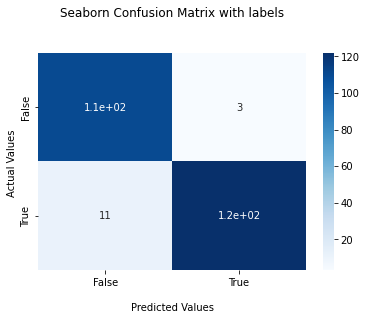

In [65]:
import seaborn as sns

ax = sns.heatmap(cm_rf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [71]:
TP = cm_rf[1,1] 
TN = cm_rf[0,0] 
FP = cm_rf[0,1] 
FN = cm_rf[1,0] 

In [72]:
accuracy_score(y_test,y_test_predicted)

0.943089430894309

In [73]:
print("Recall",TP / float(TP+FN))

print("Precision:-", TP / float(TP+FP))

Recall 0.9172932330827067
Precision:- 0.976


In [74]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       113
           1       0.98      0.92      0.95       133

    accuracy                           0.94       246
   macro avg       0.94      0.95      0.94       246
weighted avg       0.95      0.94      0.94       246

